In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train_ctrUa4K.csv')

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train_df = train.copy()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_info = pd.DataFrame({'Unique_values':train.nunique(),'Data_types':train.dtypes,'Missing_values':train.isnull().sum(),'Missing_value_ratio':train.isnull().sum()/len(train)},index = train.columns)
train_info

,Unique_values,Data_types,Missing_values,Missing_value_ratio
Loan_ID,614,object,0,0.000000
Gender,2,object,13,0.021173
Married,2,object,3,0.004886
Dependents,4,object,15,0.024430
Education,2,object,0,0.000000
Self_Employed,2,object,32,0.052117
ApplicantIncome,505,int64,0,0.000000
CoapplicantIncome,287,float64,0,0.000000
LoanAmount,203,float64,22,0.035831
Loan_Amount_Term,10,float64,14,0.022801


. Loan_ID - Unique id of the customer


. Credit_History - It have only two unique values and its data types is float. So it may have only two numerical values which represent some category. So, may we have to change the data types of this variable because it may represent some category

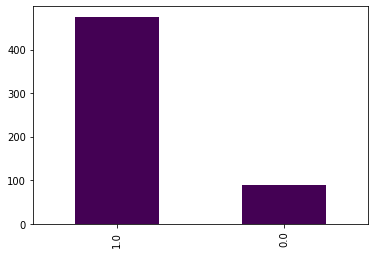

In [ ]:
train['Credit_History'].value_counts().plot(kind = 'bar',cmap = 'viridis')

In [ ]:
train['Credit_History'] = train['Credit_History'].astype('category')

In [ ]:
train.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area          object
Loan_Status            object
dtype: object

In [ ]:
categorical_variables = train.select_dtypes(include = ['object','category']).columns

In [ ]:
categorical_variables

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

******** value counts of Gender ***************
 


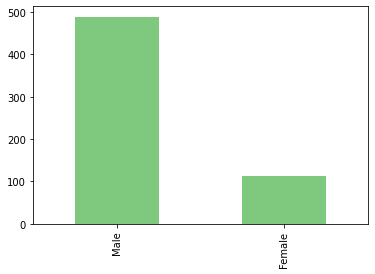

******** value counts of Married ***************
 


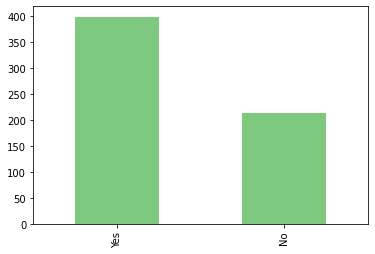

******** value counts of Dependents ***************
 


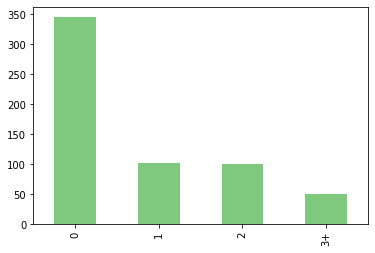

******** value counts of Education ***************
 


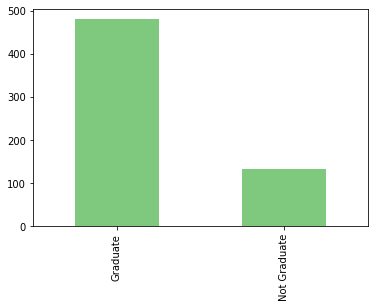

******** value counts of Self_Employed ***************
 


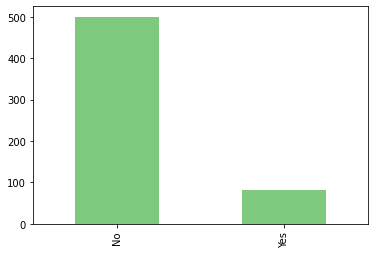

******** value counts of Credit_History ***************
 


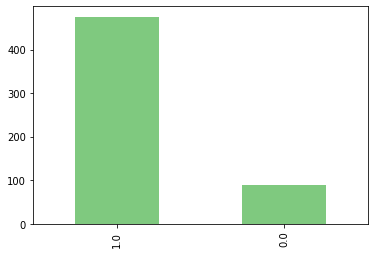

******** value counts of Property_Area ***************
 


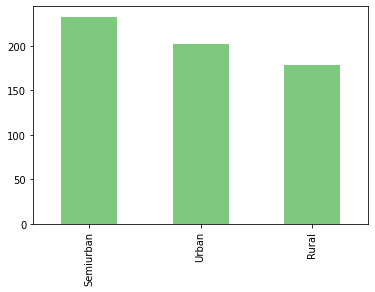

******** value counts of Loan_Status ***************
 


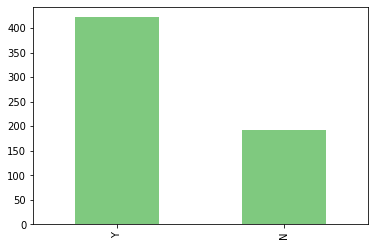

In [ ]:
for i in categorical_variables:
    if train[i].nunique() <= 8:
        print('******** value counts of',i,'***************')
        
        train[i].value_counts().plot(kind = 'bar',cmap = 'Accent')
        print(' ')
        plt.show()

In [ ]:
for i in categorical_variables:
    if train[i].nunique() <= 8:
        print('************* value counts of',i,'***********')
        
        print(train[i].value_counts())
        print(' ')

************* value counts of Gender ***********
Male      489
Female    112
Name: Gender, dtype: int64
 
************* value counts of Married ***********
Yes    398
No     213
Name: Married, dtype: int64
 
************* value counts of Dependents ***********
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 
************* value counts of Education ***********
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
 
************* value counts of Self_Employed ***********
No     500
Yes     82
Name: Self_Employed, dtype: int64
 
************* value counts of Credit_History ***********
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 
************* value counts of Property_Area ***********
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 
************* value counts of Loan_Status ***********
Y    422
N    192
Name: Loan_Status, dtype: int64
 


In [ ]:
for i in categorical_variables:
    if train[i].nunique() <= 8:
        print(' ')
        print('************ Percentage counts of',i,'*****************')
        
        print(train[i].value_counts()/len(train)* 100)

 
************ Percentage counts of Gender *****************
Male      79.641694
Female    18.241042
Name: Gender, dtype: float64
 
************ Percentage counts of Married *****************
Yes    64.820847
No     34.690554
Name: Married, dtype: float64
 
************ Percentage counts of Dependents *****************
0     56.188925
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64
 
************ Percentage counts of Education *****************
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64
 
************ Percentage counts of Self_Employed *****************
No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64
 
************ Percentage counts of Credit_History *****************
1.0    77.361564
0.0    14.495114
Name: Credit_History, dtype: float64
 
************ Percentage counts of Property_Area *****************
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area

******** Gender ***************
 


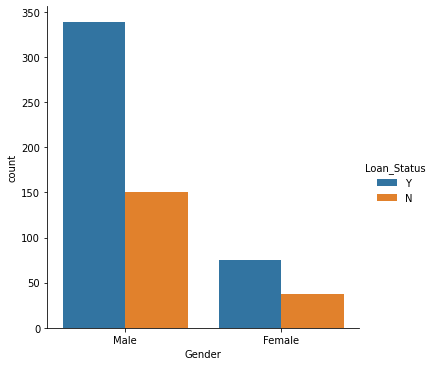

******** Married ***************
 


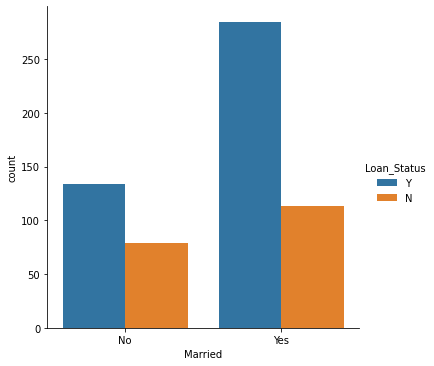

******** Dependents ***************
 


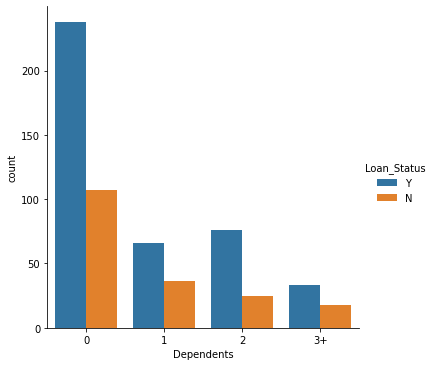

******** Education ***************
 


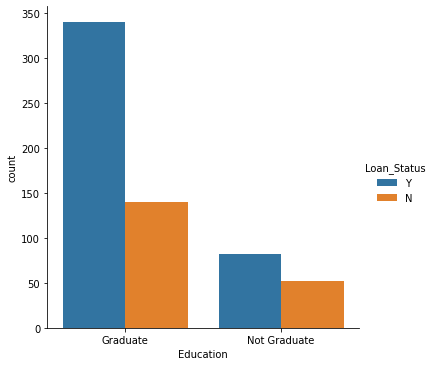

******** Self_Employed ***************
 


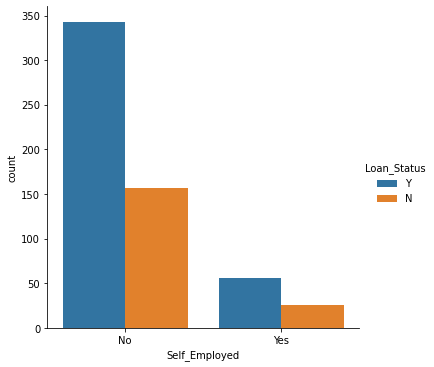

******** Credit_History ***************
 


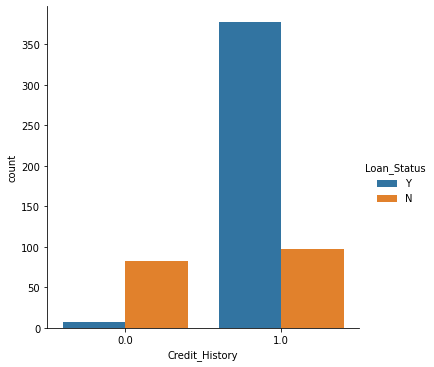

******** Property_Area ***************
 


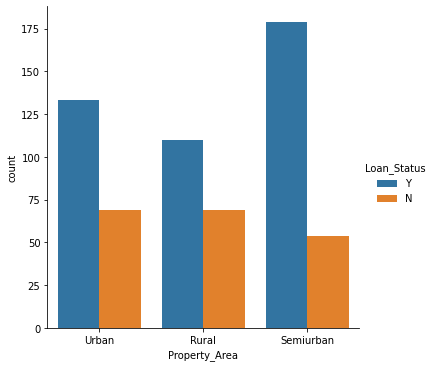

In [ ]:
for i in categorical_variables:
    if train[i].nunique() <= 8:
        
        if (i == 'Loan_Status'):
            break
        print('********',i,'***************')
        print(' ')
        print(sns.catplot(x=i,kind='count',hue='Loan_Status',data = train))
        plt.show()
        

In [ ]:
numerical_variables = train.select_dtypes(include = ['int64','float64']).columns
numerical_variables

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

********** ApplicantIncome **************
 
AxesSubplot(0.125,0.125;0.775x0.755)


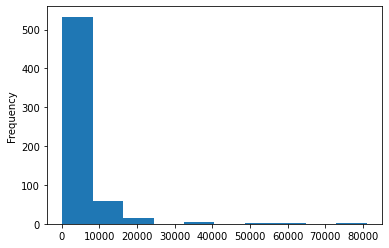

********** CoapplicantIncome **************
 
AxesSubplot(0.125,0.125;0.775x0.755)


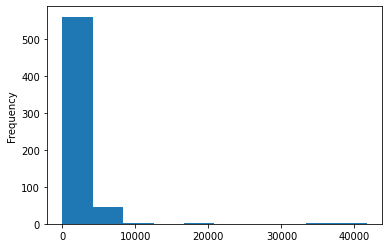

********** LoanAmount **************
 
AxesSubplot(0.125,0.125;0.775x0.755)


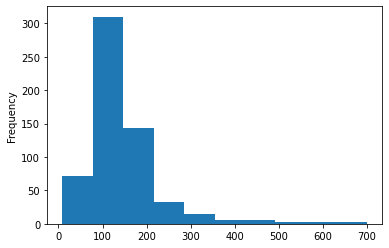

********** Loan_Amount_Term **************
 
AxesSubplot(0.125,0.125;0.775x0.755)


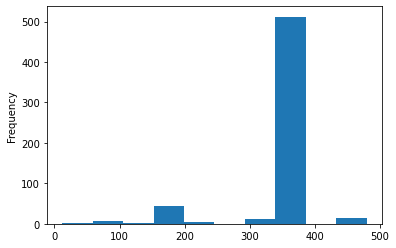

In [ ]:
for i  in numerical_variables:
    
    print('**********',i,'**************')
    print(' ')
    print(train[i].plot(kind = 'hist'))
    plt.show()
    

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term']/12

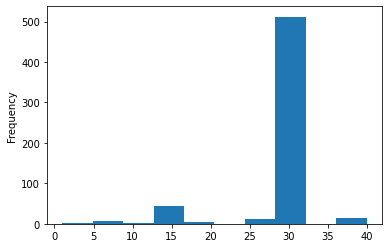

In [ ]:
train['Loan_Amount_Term'].plot(kind = 'hist')

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y


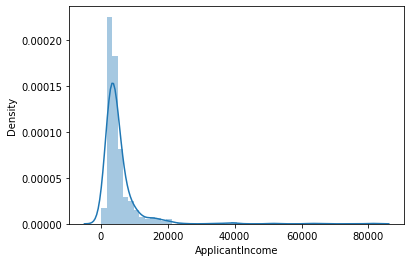

In [ ]:
sns.distplot(train['ApplicantIncome'])

In [ ]:
train['ApplicantIncome'].max()

81000

In [ ]:
train['ApplicantIncome'].min()

150

In [ ]:
train_info

,Unique_values,Data_types,Missing_values,Missing_value_ratio
Loan_ID,614,object,0,0.000000
Gender,2,object,13,0.021173
Married,2,object,3,0.004886
Dependents,4,object,15,0.024430
Education,2,object,0,0.000000
Self_Employed,2,object,32,0.052117
ApplicantIncome,505,int64,0,0.000000
CoapplicantIncome,287,float64,0,0.000000
LoanAmount,203,float64,22,0.035831
Loan_Amount_Term,10,float64,14,0.022801


In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace= True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

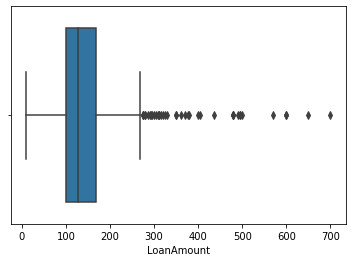

In [ ]:
sns.boxplot(train['LoanAmount'])

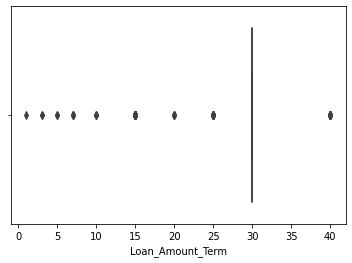

In [ ]:
sns.boxplot(train['Loan_Amount_Term'])

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
train.drop('Loan_ID',axis=1,inplace= True)

In [ ]:
train['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [ ]:
train_categorical_variables = train.select_dtypes(include = ['object','bool','category']).columns


In [ ]:
train_categorical_variables 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train_categorical = train[train_categorical_variables]

In [ ]:
train_numerical_variables = train.select_dtypes(include = ['int64','float64']).columns
train_numerical_variables


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')

In [ ]:
train_numerical = train[train_numerical_variables]

In [ ]:
le_col = []
for i in train_categorical_variables:
    if train[i].nunique()==2:
        le_col.append(i)

In [ ]:
le_col

['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

In [ ]:
le = LabelEncoder()
for j in le_col:
    train_categorical[j] = le.fit_transform(train_categorical[j])

In [ ]:
train_categorical

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,Urban
1,1,1,1,0,0,1,Rural
2,1,1,0,0,1,1,Urban
3,1,1,0,1,0,1,Urban
4,1,0,0,0,0,1,Urban
...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,Rural
610,1,1,3+,0,0,1,Rural
611,1,1,1,0,0,1,Urban
612,1,1,2,0,0,1,Urban


In [ ]:
train_categorical = pd.get_dummies(train_categorical)
train_categorical

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,1,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,0,0,1
3,1,1,1,0,1,1,0,0,0,0,0,1
4,1,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,1,0,0,0,1,0,0
610,1,1,0,0,1,0,0,0,1,1,0,0
611,1,1,0,0,1,0,1,0,0,0,0,1
612,1,1,0,0,1,0,0,1,0,0,0,1


In [ ]:
train_categorical

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,1,1,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,1,0,0
2,1,1,0,1,1,1,0,0,0,0,0,1
3,1,1,1,0,1,1,0,0,0,0,0,1
4,1,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,1,0,0,0,1,0,0
610,1,1,0,0,1,0,0,0,1,1,0,0
611,1,1,0,0,1,0,1,0,0,0,0,1
612,1,1,0,0,1,0,0,1,0,0,0,1


In [ ]:
scaled= MinMaxScaler()
train_numerical = pd.DataFrame(scaled.fit_transform(train_numerical),columns = train_numerical.columns)
train_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,0.070489,0.000000,0.172214,0.743590,1.0
1,0.054830,0.036192,0.172214,0.743590,0.0
2,0.035250,0.000000,0.082489,0.743590,1.0
3,0.030093,0.056592,0.160637,0.743590,1.0
4,0.072356,0.000000,0.191027,0.743590,1.0
...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0
610,0.048930,0.000000,0.044863,0.358974,1.0
611,0.097984,0.005760,0.353111,0.743590,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0


In [ ]:
train = pd.concat([train_categorical,train_numerical],axis=1)
train

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,1,1,0,0,0,0,0,1,0.070489,0.000000,0.172214,0.743590,1.0
1,1,1,0,0,1,0,1,0,0,1,0,0,0.054830,0.036192,0.172214,0.743590,0.0
2,1,1,0,1,1,1,0,0,0,0,0,1,0.035250,0.000000,0.082489,0.743590,1.0
3,1,1,1,0,1,1,0,0,0,0,0,1,0.030093,0.056592,0.160637,0.743590,1.0
4,1,0,0,0,1,1,0,0,0,0,0,1,0.072356,0.000000,0.191027,0.743590,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1,1,0,0,0,1,0,0,0.034014,0.000000,0.089725,0.743590,1.0
610,1,1,0,0,1,0,0,0,1,1,0,0,0.048930,0.000000,0.044863,0.358974,1.0
611,1,1,0,0,1,0,1,0,0,0,0,1,0.097984,0.005760,0.353111,0.743590,1.0
612,1,1,0,0,1,0,0,1,0,0,0,1,0.091936,0.000000,0.257598,0.743590,1.0


In [ ]:
train.corr()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.009170,-0.148421,-0.004466,0.129953,0.096319,0.080283,-0.108623,0.034530,0.058809,0.082912,0.106904,-0.074030,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.010938,-0.348175,0.113853,0.249547,0.132566,-0.006805,0.005845,0.000546,0.051708,0.075948,0.146546,-0.100912,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.073658,-0.036563,-0.013355,0.020822,0.055288,0.077520,-0.039410,-0.034279,-0.140760,-0.062290,-0.168759,-0.073928,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,-0.001550,-0.088254,0.082044,0.032434,0.003278,0.022065,0.008710,-0.030338,0.127180,-0.016100,0.115100,-0.033739,-0.003700
Credit_History,0.009170,0.010938,-0.073658,-0.001550,1.000000,0.020500,0.009757,0.007987,-0.060473,-0.020906,0.035976,-0.016934,-0.018615,0.011134,-0.000607,-0.004705,0.540556
Dependents_0,-0.148421,-0.348175,-0.036563,-0.088254,0.020500,1.000000,-0.531373,-0.528246,-0.358315,0.044015,-0.004173,-0.038264,-0.092599,-0.008292,-0.147639,0.118163,-0.003044
Dependents_1,-0.004466,0.113853,-0.013355,0.082044,0.009757,-0.531373,1.000000,-0.198046,-0.134337,-0.084117,0.011661,0.069320,0.040861,-0.029769,0.061976,-0.088492,-0.038740
Dependents_2,0.129953,0.249547,0.020822,0.032434,0.007987,-0.528246,-0.198046,1.000000,-0.133547,-0.004298,-0.012017,0.016569,-0.034650,0.010016,0.020126,-0.010609,0.062384
Dependents_3+,0.096319,0.132566,0.055288,0.003278,-0.060473,-0.358315,-0.134337,-0.133547,1.000000,0.040670,0.007863,-0.047460,0.156687,0.041491,0.152850,-0.077273,-0.026123
Property_Area_Rural,0.080283,-0.006805,0.077520,0.022065,-0.020906,0.044015,-0.084117,-0.004298,0.040670,1.000000,-0.501646,-0.449168,0.015829,0.005329,0.043467,0.034321,-0.100694


In [ ]:
train.drop(['Dependents_3+','Property_Area_Urban'],axis=1,inplace=True)

In [ ]:
X = train.drop('Loan_Status',axis=1)
y = train[['Loan_Status']]

In [ ]:
X.shape , y.shape

((614, 14), (614, 1))

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.2, stratify = y['Loan_Status'],random_state = 42)

In [ ]:
train_x.shape, test_x.shape , train_y.shape , test_y.shape

((491, 14), (123, 14), (491, 1), (123, 1))

### Logistic Regression

In [ ]:
model_1 = LogisticRegression()
model_1.fit(train_x,train_y)



train_predict_1 = model_1.predict(train_x)
test_predict_1 = model_1.predict(test_x)

### Decision Tree 

In [ ]:
model_2 = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)
model_2.fit(train_x,train_y)


train_predict_2 = model_2.predict(train_x)
test_predict_2 = model_2.predict(test_x)

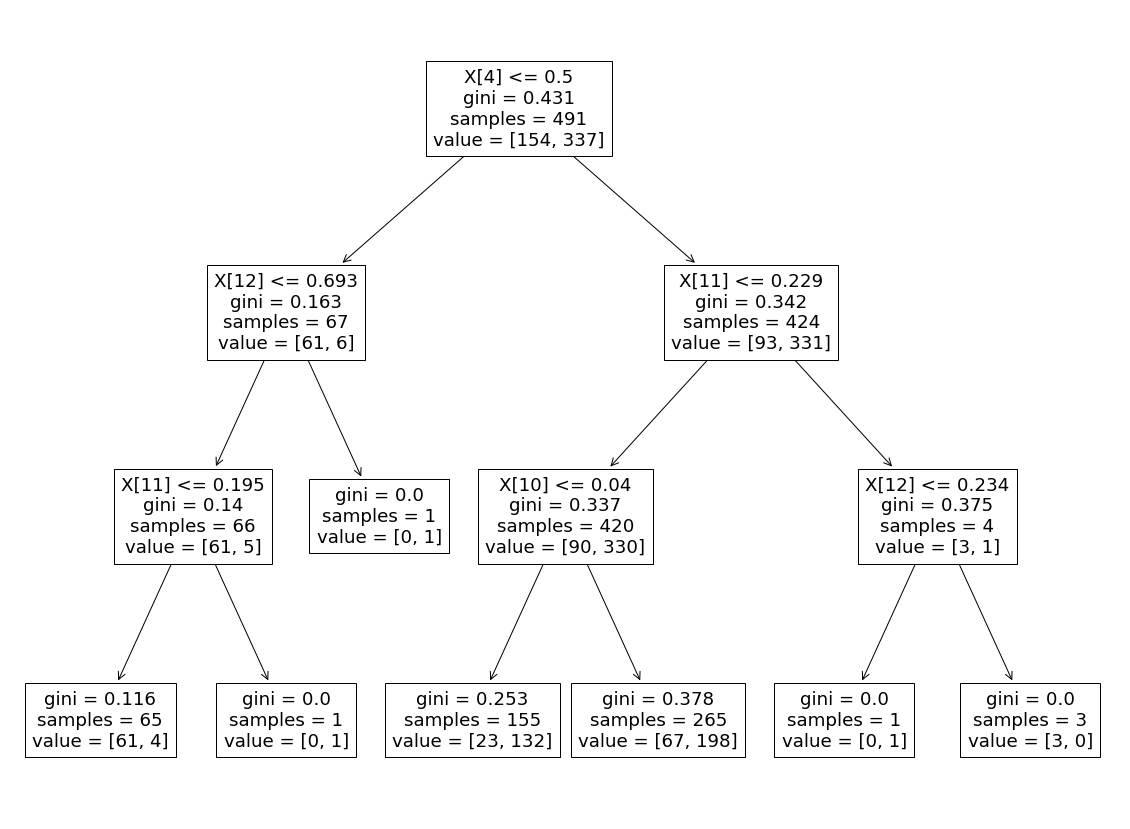

In [ ]:
plt.figure(figsize = (20,15))
tree.plot_tree(model_2.fit(train_x,train_y))
plt.show()

### Random Forest

In [ ]:
model_3 = RandomForestClassifier(max_depth = 3)
model_3.fit(train_x,train_y)

train_predict_3 = model_3.predict(train_x)
test_predict_3 = model_3.predict(test_x)

### Support Vector Machine

In [ ]:
model_4 = SVC()
model_4.fit(train_x,train_y)

train_predict_4 = model_4.predict(train_x)
test_predict_4 = model_4.predict(test_x)

### KNearestNeighbors

In [ ]:
model_5 = KNN(n_neighbors = 10)
model_5.fit(train_x,train_y)

train_predict_5 = model_5.predict(train_x)
test_predict_5 = model_5.predict(test_x)

In [ ]:
f1_score(test_predict_5,test_y)

0.8691099476439791

In [ ]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [ ]:
#Defining K range
k = range(6, 20, 2)

In [ ]:
# calling above defined function
test = Elbow(k)

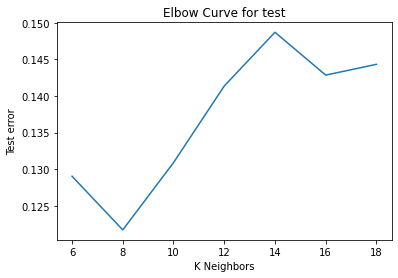

In [ ]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')
plt.show()

In [ ]:
model_5 = KNN(n_neighbors = 8)
model_5.fit(train_x,train_y)

train_predict_5 = model_5.predict(train_x)
test_predict_5 = model_5.predict(test_x)

In [ ]:
f1_score(test_predict_5,test_y)

0.8783068783068784

### Evaluation Score Of Different model

In [ ]:
Model_score = pd.DataFrame({'Training_accuracy_score':[accuracy_score(train_y,train_predict_1),accuracy_score(train_y,train_predict_2),
                                              accuracy_score(train_y,train_predict_3),accuracy_score(train_y,train_predict_4),accuracy_score(train_y,train_predict_5)],
                            'Test_accuracy_score':[accuracy_score(test_y,test_predict_1),accuracy_score(test_y,test_predict_2),
                                          accuracy_score(test_y,test_predict_3),accuracy_score(test_y,test_predict_4),accuracy_score(test_y,test_predict_5)],
                           'F1_Score_test':[f1_score(test_y,test_predict_1),f1_score(test_y,test_predict_2),
                                            f1_score(test_y,test_predict_3),f1_score(test_y,test_predict_4),f1_score(test_y,test_predict_5)]},
                           index = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SupportVectorMachine','kNearestNeighbors'])

In [ ]:
Model_score

,Training_accuracy_score,Test_accuracy_score,F1_Score_test
LogisticRegression,0.798371,0.853659,0.903226
DecisionTreeClassifier,0.808554,0.845528,0.898396
RandomForestClassifier,0.802444,0.853659,0.903226
SupportVectorMachine,0.798371,0.853659,0.903226
kNearestNeighbors,0.796334,0.813008,0.878307


### Applying Neural Network

In [ ]:
train_x.shape

(491, 14)

In [ ]:
train_x.shape[1]

14

In [ ]:
input_neurons = train_x.shape[1]

In [ ]:
output_neurons = 1

In [ ]:
number_of_hidden_layers = 3
neuron_hidden_layer_1 =20
neuron_hidden_layer_2 = 10
neuron_hidden_layer_3 = 5

In [ ]:
neural_network_model = Sequential()
neural_network_model.add(InputLayer(input_shape = (input_neurons)))
neural_network_model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
neural_network_model.add(Dense(units = neuron_hidden_layer_2,activation='relu'))
neural_network_model.add(Dense(units = neuron_hidden_layer_3,activation='relu'))
neural_network_model.add(Dense(units=output_neurons,activation='sigmoid'))

In [ ]:
neural_network_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
neural_network_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model_history = neural_network_model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 32ms/step - loss: 0.7275 - accuracy: 0.3495 - val_loss: 0.7080 - val_accuracy: 0.3902
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4509 - val_loss: 0.6883 - val_accuracy: 0.4797
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5927 - val_loss: 0.6721 - val_accuracy: 0.6667
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.7334 - val_loss: 0.6356 - val_accuracy: 0.7154
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6249 - accuracy: 0.7606 - val_loss: 0.6021 - val_accuracy: 0.6992
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.7188 - val_loss: 0.5824 - val_accuracy: 0.6992
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5835 - accuracy: 0.7268 - val_loss: 0.5661 - val_accuracy: 0.7073
Epoch 8/50
16/16 [=

In [ ]:
predictions = neural_network_model.predict_classes(test_x)

In [ ]:
accuracy_score(test_y,predictions)

0.8455284552845529

### Visualizing Model Performance

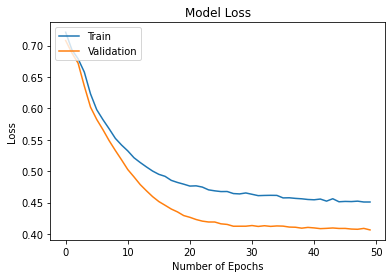

In [ ]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

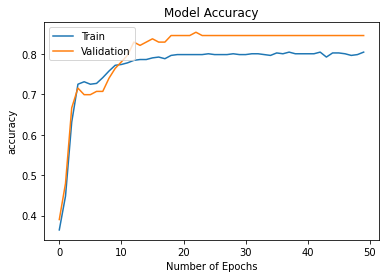

In [ ]:
# Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

### Prediction on Test Data

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test_df = test.copy()

In [ ]:
test_info = pd.DataFrame({'Data_Types': test.dtypes,'Unique_value':test.nunique(),'Missing_values':test.isnull().sum(),
                          'Missing_value_ratio':test.isnull().sum()/len(test)})
test_info

,Data_Types,Unique_value,Missing_values,Missing_value_ratio
Loan_ID,object,367,0,0.000000
Gender,object,2,11,0.029973
Married,object,2,0,0.000000
Dependents,object,4,10,0.027248
Education,object,2,0,0.000000
Self_Employed,object,2,23,0.062670
ApplicantIncome,int64,314,0,0.000000
CoapplicantIncome,int64,194,0,0.000000
LoanAmount,float64,144,5,0.013624
Loan_Amount_Term,float64,12,6,0.016349


In [ ]:
test['Credit_History'] = test['Credit_History'].astype('category')

In [ ]:
test.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area          object
dtype: object

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [ ]:
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test_categorical_variables = test.select_dtypes(include = ['category','object']).columns
test_numerical_variables = test.select_dtypes(include = ['int64','float64']).columns

In [ ]:
test_categorical = test[test_categorical_variables]
test_numerical = test[test_numerical_variables]

In [ ]:
for i in test_categorical:
  if test_categorical[i].nunique() == 2:
    test_categorical[i] = le.fit_transform(test_categorical[i])


In [ ]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test_categorical.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
test_categorical = pd.get_dummies(test_categorical)
test_categorical

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,1,1,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,1,0,0,0,1
3,1,1,0,0,1,0,0,1,0,0,0,1
4,1,0,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1,1,1,0,0,0,1,0,0,1
363,1,1,0,0,1,1,0,0,0,0,0,1
364,1,0,0,0,1,1,0,0,0,0,1,0
365,1,1,0,0,1,1,0,0,0,1,0,0


In [ ]:
test_categorical.drop(['Dependents_3+','Property_Area_Urban'],axis=1,inplace=True)

In [ ]:
test_numerical = pd.DataFrame(scaled.fit_transform(test_numerical),columns = test_numerical.columns)
test_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.078865,0.000000,0.157088,0.746835
1,0.042411,0.062500,0.187739,0.746835
2,0.068938,0.075000,0.344828,0.746835
3,0.032263,0.106083,0.137931,0.746835
4,0.045168,0.000000,0.095785,0.746835
...,...,...,...,...
362,0.055274,0.074042,0.162835,0.746835
363,0.057329,0.029542,0.166667,0.746835
364,0.044810,0.083042,0.187739,0.746835
365,0.068938,0.099708,0.249042,0.746835


In [ ]:
test = pd.concat([test_categorical,test_numerical],axis=1)
test

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,1,0,0,1,1,0,0,0,0,0.078865,0.000000,0.157088,0.746835
1,1,1,0,0,1,0,1,0,0,0,0.042411,0.062500,0.187739,0.746835
2,1,1,0,0,1,0,0,1,0,0,0.068938,0.075000,0.344828,0.746835
3,1,1,0,0,1,0,0,1,0,0,0.032263,0.106083,0.137931,0.746835
4,1,0,1,0,1,1,0,0,0,0,0.045168,0.000000,0.095785,0.746835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1,1,1,0,0,0,0,0,0.055274,0.074042,0.162835,0.746835
363,1,1,0,0,1,1,0,0,0,0,0.057329,0.029542,0.166667,0.746835
364,1,0,0,0,1,1,0,0,0,1,0.044810,0.083042,0.187739,0.746835
365,1,1,0,0,1,1,0,0,1,0,0.068938,0.099708,0.249042,0.746835


In [ ]:
Model_score

,Training_accuracy_score,Test_accuracy_score,F1_Score_test
LogisticRegression,0.798371,0.853659,0.903226
DecisionTreeClassifier,0.808554,0.845528,0.898396
RandomForestClassifier,0.802444,0.853659,0.903226
SupportVectorMachine,0.798371,0.853659,0.903226
kNearestNeighbors,0.796334,0.813008,0.878307


In [ ]:
test['Loan_Status'] = model_3.predict(test)
test['Loan_Status']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
362    1.0
363    1.0
364    1.0
365    1.0
366    1.0
Name: Loan_Status, Length: 367, dtype: float64

In [ ]:
test['Loan_Status'].value_counts()

1.0    308
0.0     59
Name: Loan_Status, dtype: int64

In [ ]:
test['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)

In [ ]:
test

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,1,0,0,1,1,0,0,0,0,0.078865,0.000000,0.157088,0.746835,Y
1,1,1,0,0,1,0,1,0,0,0,0.042411,0.062500,0.187739,0.746835,Y
2,1,1,0,0,1,0,0,1,0,0,0.068938,0.075000,0.344828,0.746835,Y
3,1,1,0,0,1,0,0,1,0,0,0.032263,0.106083,0.137931,0.746835,Y
4,1,0,1,0,1,1,0,0,0,0,0.045168,0.000000,0.095785,0.746835,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1,1,1,0,0,0,0,0,0.055274,0.074042,0.162835,0.746835,Y
363,1,1,0,0,1,1,0,0,0,0,0.057329,0.029542,0.166667,0.746835,Y
364,1,0,0,0,1,1,0,0,0,1,0.044810,0.083042,0.187739,0.746835,Y
365,1,1,0,0,1,1,0,0,1,0,0.068938,0.099708,0.249042,0.746835,Y


In [ ]:
Loan_ID = test_df[['Loan_ID']]
Loan_Status = test[['Loan_Status']]

In [ ]:
Submit_test = pd.concat([Loan_ID,Loan_Status],axis=1)
Submit_test

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
Submit_test.set_index('Loan_ID',inplace=True)

In [ ]:
Submit_test

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [ ]:
Submit_test.to_csv('/content/drive/MyDrive/submit_test.csv')

In [ ]:
train.corr()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Property_Area_Rural,Property_Area_Semiurban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
Gender,1.000000,0.364569,0.045364,-0.000525,0.009170,-0.148421,-0.004466,0.129953,0.080283,-0.108623,0.058809,0.082912,0.106904,-0.074030,0.017987
Married,0.364569,1.000000,0.012304,0.004489,0.010938,-0.348175,0.113853,0.249547,-0.006805,0.005845,0.051708,0.075948,0.146546,-0.100912,0.091478
Education,0.045364,0.012304,1.000000,-0.010383,-0.073658,-0.036563,-0.013355,0.020822,0.077520,-0.039410,-0.140760,-0.062290,-0.168759,-0.073928,-0.085884
Self_Employed,-0.000525,0.004489,-0.010383,1.000000,-0.001550,-0.088254,0.082044,0.032434,0.022065,0.008710,0.127180,-0.016100,0.115100,-0.033739,-0.003700
Credit_History,0.009170,0.010938,-0.073658,-0.001550,1.000000,0.020500,0.009757,0.007987,-0.020906,0.035976,-0.018615,0.011134,-0.000607,-0.004705,0.540556
Dependents_0,-0.148421,-0.348175,-0.036563,-0.088254,0.020500,1.000000,-0.531373,-0.528246,0.044015,-0.004173,-0.092599,-0.008292,-0.147639,0.118163,-0.003044
Dependents_1,-0.004466,0.113853,-0.013355,0.082044,0.009757,-0.531373,1.000000,-0.198046,-0.084117,0.011661,0.040861,-0.029769,0.061976,-0.088492,-0.038740
Dependents_2,0.129953,0.249547,0.020822,0.032434,0.007987,-0.528246,-0.198046,1.000000,-0.004298,-0.012017,-0.034650,0.010016,0.020126,-0.010609,0.062384
Property_Area_Rural,0.080283,-0.006805,0.077520,0.022065,-0.020906,0.044015,-0.084117,-0.004298,1.000000,-0.501646,0.015829,0.005329,0.043467,0.034321,-0.100694
Property_Area_Semiurban,-0.108623,0.005845,-0.039410,0.008710,0.035976,-0.004173,0.011661,-0.012017,-0.501646,1.000000,-0.014246,-0.027044,-0.005804,0.059141,0.136540
